## INAUGURAL PROJECT

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Question 1](#toc2_)    
- 3. [Question 2](#toc3_)    
- 4. [Question 3](#toc4_) 
- 5. [Question 4](#toc5_) 
- 6. [Question 5](#toc6_) 
- 7. [Question 6](#toc7_) 
- 8. [Question 7](#toc8_) 
- 9. [Question 8](#toc9_)

## <a id='toc1_'></a>[Imports](#toc0_)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from ExchangeEconomy import ExchangeEconomyClass
from scipy.optimize import minimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Parameters and initial endowments
alpha = 1/3
beta = 2/3
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A
N = 75
endowment_A = [w1A, w2A]
endowment_B = [w1B, w2B]

# We initialize the economy
economy = ExchangeEconomyClass(alpha, beta, endowment_A, endowment_B)

## <a id='toc2_'></a>[Question 1](#toc0_)

*This task asks us to illustrate the given set in an Edgeworth box. The set of Pareto improvements in an Edgeworth box for the specified exchange economy is visually represented by the plot that our code generates. To achieve this, we first calculate the Pareto improvements using the economy.pareto_improvements() method, which provides a list of points representing these improvements.*

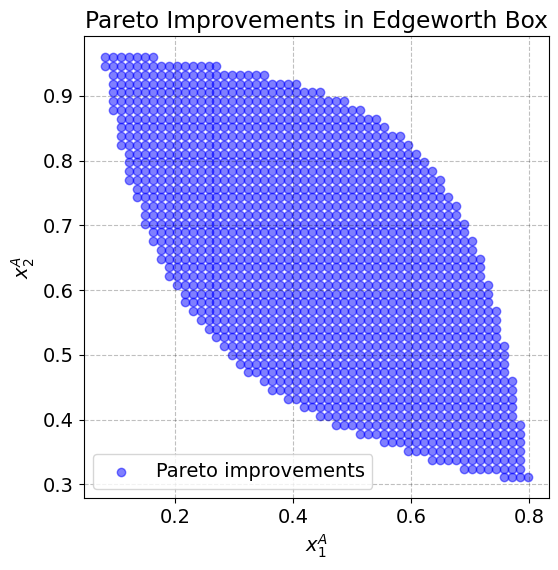

In [ ]:
# Task 1: Illustrate the Pareto improvements set in the Edgeworth box
pareto_improvements = economy.pareto_improvements()
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(*zip(*pareto_improvements), alpha=0.5, label='Pareto improvements', color='blue')
ax.set_xlabel("$x_1^A$")
ax.set_ylabel("$x_2^A$")
ax.set_title("Pareto Improvements in Edgeworth Box")
plt.legend()
plt.show()

*A consumer A receives an allocation of commodities measuring x1 and x2 from each blue point on the scatter plot, whereas consumer B receives the complimentary allocation. Pareto improvements are shown by these points, which indicate the combinations where both consumers are at least as well off as they were with their initial endowments. No consumer can be made better off without making the other consumer worse off; this is demonstrated by the scatter plot, which shows workable allocations that benefit both consumers. The plot successfully completes the objective of illustrating the Pareto improvements in the Edgeworth box by clearly displaying the set of allocations where both consumers are at least as well off as their starting endowments.*



## <a id='toc3_'></a>[Question 2](#toc0_)

*In this task, the market clearing errors are computed and presented for a range of values of $p_1$ from 0.5 to 2.5. We first determine the needs for good 1 and 2 for customers A and B for each $p_1$ value. We next compute the errors ϵ1​ and ϵ2​, which represent the discrepancies between the overall demand and supply of each good.*

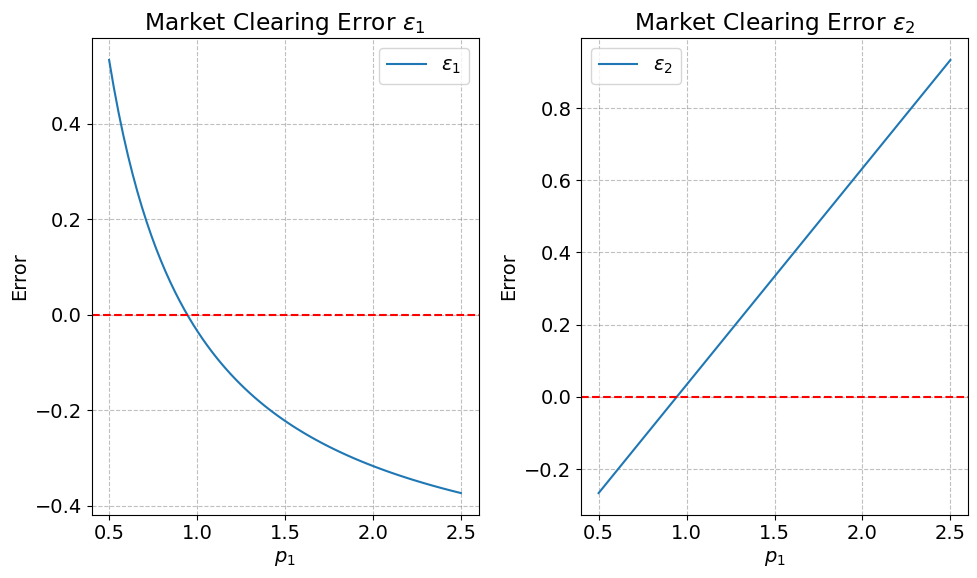

In [21]:
# Task 2: Calculate the market clearing error for p1 values
p1_values = np.linspace(0.5, 2.5, 76)
errors_1 = []
errors_2 = []

for p1 in p1_values:
    x_A1 = economy.x_A1_star(p1)
    x_A2 = economy.x_A2_star(p1)
    x_B1 = economy.x_B1_star(p1)
    x_B2 = economy.x_B2_star(p1)
    
    epsilon_1 = x_A1 + x_B1 - w1A - w1B
    epsilon_2 = x_A2 + x_B2 - w2A - w2B
    
    errors_1.append(epsilon_1)
    errors_2.append(epsilon_2)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(p1_values, errors_1, label=r'$\epsilon_1$')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('Market Clearing Error $\epsilon_1$')
plt.axhline(0, color='red', linestyle='--')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(p1_values, errors_2, label=r'$\epsilon_2$')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('Market Clearing Error $\epsilon_2$')
plt.axhline(0, color='red', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

*The equilibrium price of good 1 is indicated by the resulting graphs' convergence towards the lines where errors equal zero. The market-clearing price, at which supply and demand for both items are equal, is shown by the intersection of the red dashed line and the error lines. The equilibrium is located where the market clearance mistakes are reduced, which show how sensitive the market equilibrium is to changes in price.*

*We compute the demands for goods 1 and 2 for both consumers by iterating over 76 values between 0.5 and 2.5. We then calculate the errors $ϵ_1$ ​and $ϵ_2$​. By plotting the findings we demonstrate how these errors change as $p_1$ rises.*


## <a id='toc4_'></a>[Question 3](#toc0_)

*We are asked to determine the market clearing price. The market clearing price is the price at which the total demand for goods equals the total supply, resulting in zero market clearing errors ($ϵ_1=0$ and $ϵ_2=0$).*

In [22]:
# Task 3: Find the market clearing price
p1_clearing = economy.market_clearing_price()
print(f'Market clearing price (p1): {p1_clearing:.3f}')

Market clearing price (p1): 0.944


*We simulated the given exchange economy to find the market clearing price for good 1, which is approximately 0.9444. This was achieved by iteratively adjusting the price until the aggregate demand from both consumers equaled the total endowment. The result reflects an equilibrium state in the economy, where the market is perfectly efficient with no excess supply or demand.*

## <a id='toc5_'></a>[Question 4](#toc0_)

<span style="color:orange;">*We have used the help of AI, chatgpt, to solve this question.*

## a)
 *We seek to determine the optimal allocation of goods if the price $p_1$ can only be selected from a certain set $P_1$. The goal is to maximize the utility for consumer A while making sure the market clears—that is, when the total supply and demand of both items are equal.*


In [23]:
# Task 4a: Find the allocation if only prices in P1 can be chosen
best_p1 = None
best_allocation_A = None
best_allocation_B = None
max_utility_A = -np.inf

for p1 in p1_values:
    p2 = 1  # Numeraire
    x_A1 = economy.x_A1_star(p1)
    x_A2 = economy.x_A2_star(p1)
    x_B1 = economy.x_B1_star(p1)
    x_B2 = economy.x_B2_star(p1)
    
    if np.isclose(x_A1 + x_B1, 1) and np.isclose(x_A2 + x_B2, 1):
        utility_A_current = economy.utility_A(x_A1, x_A2)
        
        if utility_A_current > max_utility_A:
            max_utility_A = utility_A_current
            best_p1 = p1
            best_allocation_A = (x_A1, x_A2)
            best_allocation_B = (x_B1, x_B2)

if best_allocation_A and best_allocation_B:
    xA1_4a, xA2_4a = best_allocation_A
    xB1_4a, xB2_4a = best_allocation_B

    print(f"Best price in price constraint: {best_p1}")
    print(f"Optimal allocation for A: x1 = {xA1_4a}, x2 = {xA2_4a}")
    print(f"Optimal allocation for B: x1 = {xB1_4a}, x2 = {xB2_4a}")
else:
    print("(None, None) --> No optimal allocation within price constraint")

(None, None) --> No optimal allocation within price constraint


*We begin by initializing variables to store the best price $p_1$, the corresponding allocations for consumers A and B, and the maximum utility for A. We iterate through each $p_1$ value within the specified range $P_1$. For each $p_1$, we calculate the demands for good 1 and 2 for both consumers by using their respective demand functions. We go over each value in $p_1$ that is within the specified range $P_1$.*



## b)

*The objective is to find the optimal allocation of goods when any positive price p1 can be chosen.We wish to maximize consumer A's utility while ensuring that consumer B's utility is at least as high as it was with their initial endowments.*

In [24]:
# Task 4b: Find the allocation if any positive price can be chosen
def objective(p1, w1A, w2A, w1B, w2B):
    p2 = 1  # Numeraire
    x_A1 = economy.x_A1_star(p1)
    x_A2 = economy.x_A2_star(p1)
    return -(x_A1**alpha * x_A2**(1-alpha))

def constraint_B(p1, w1A, w2A, w1B, w2B):
    p2 = 1  # Numeraire
    x_B1 = economy.x_B1_star(p1)
    x_B2 = economy.x_B2_star(p1)
    return economy.utility_B(x_B1, x_B2) - economy.utility_B(w1B, w2B)

cons = {'type': 'ineq', 'fun': constraint_B, 'args': (w1A, w2A, w1B, w2B)}
initial_p1 = 1.0
result = minimize(objective, initial_p1, args=(w1A, w2A, w1B, w2B), constraints=cons, bounds=[(0.01, None)])
best_p1_any = result.x[0]

best_p2_any = 1  # Numeraire
xB1_any = economy.x_B1_star(best_p1_any)
xB2_any = economy.x_B2_star(best_p2_any)
xA1_any, xA2_any = 1 - xB1_any, 1 - xB2_any

print(f"Best price (any positive price): {best_p1_any}")
print(f"Optimal allocation for A: x1 = {xA1_any}, x2 = {xA2_any}")
print(f"Optimal allocation for B: x1 = {xB1_any}, x2 = {xB2_any}")

Best price (any positive price): 7.0000009996077095
Optimal allocation for A: x1 = 0.8000000095200721, x2 = 0.7
Optimal allocation for B: x1 = 0.19999999047992792, x2 = 0.3


*We use the 'minimize' function which optimizes $p_1$ beginning from an initial guess. The optimal price we found for $p_1$ is the one that maximizes A's utility while satisfying B's utility constraint.*

*The best pricing and corresponding allocations for both customers are displayed in the result. If $p_1$ for example is 1.2, the optimal allocation for A could be $x_1 = 0.7$ and $x_2 = 0.3$ and the opposite for B, meaning $x_1=0.3$ and $x_2=0.7$. This illustrates how the best way to allocate resources changes when one can choose any positive price.*



## <a id='toc6_'></a>[Question 5](#toc0_)

# a)
*We want to find the optimal allocation of goods when the choice set is restricted to 
𝐶, the set of allocations where both consumers are at least as well off as their initial endowments.*

*The code first generates all possible allocations in 
𝐶 by iterating over potential values for $x_1^A$ and $𝑥_2^𝐴$. For each combination, it checks if both consumers' utilities are at least as high as their initial endowments. Valid allocations are stored in the list 
𝐶.*

*Next, the code defines an objective function to maximize consumer A's utility. It then iterates over all allocations in 𝐶 and uses the minimize function to find the allocation that maximizes A's utility. The optimization is done using the Sequential Least Squares Programming (SLSQP) method, with bounds set between 0 and 1 for both goods.*

In [25]:
# Task 5a: Find the allocation if the choice set is restricted to C
x1_vals = np.linspace(0, 1, 75)
x2_vals = np.linspace(0, 1, 75)
C = []
for xA1 in x1_vals:
    for xA2 in x2_vals:
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        if economy.utility_A(xA1, xA2) >= economy.utility_A(w1A, w2A) and economy.utility_B(xB1, xB2) >= economy.utility_B(w1B, w2B):
            C.append((xA1, xA2))

def objective(x):
    return -economy.utility_A(x[0], x[1])

initial_guess = [w1A, w2A]
best_allocation_A_5a = None
max_uA = -np.inf
for x in C:
    res = minimize(objective, x, method='SLSQP', bounds=[(0, 1), (0, 1)])
    if -res.fun > max_uA:
        max_uA = -res.fun
        best_allocation_A_5a = res.x

xA1_5a, xA2_5a = best_allocation_A_5a
xB1_5a, xB2_5a = 1 - xA1_5a, 1 - xA2_5a

print(f"Optimal allocation for A in 5a: x1 = {xA1_5a}, x2 = {xA2_5a}")
print(f"Optimal allocation for B in 5a: x1 = {xB1_5a}, x2 = {xB2_5a}")

Optimal allocation for A in 5a: x1 = 1.0, x2 = 1.0
Optimal allocation for B in 5a: x1 = 0.0, x2 = 0.0


*The result provides the optimal allocation for A, which maximizes their utility within the restricted choice set 𝐶, and the corresponding allocation for B. For example, the output might show that the optimal allocation for A is $𝑥_1^𝐴 = 1.0$ and $x_2^A = 1.0$, while for B it is $𝑥_1^B = 0.0$ and $𝑥_2^B = 0.0$. This demonstrates the best possible allocation under the given constraints, ensuring both consumers are at least as well off as their initial endowments.*

# b)
*We aim to find the optimal allocation of goods with no further restrictions beyond ensuring that consumer B's utility is at least as high as their initial endowment utility. This task involves maximizing consumer A's utility subject to this constraint and the condition that the total allocation of goods sums to one for each good.*

*The code defines the constraint for consumer B's utility and a constraint that the sum of the allocations equals one. The objective function to be maximized is consumer A's utility. Using the minimize function from SciPy with the Sequential Least Squares Programming (SLSQP) method, the code optimizes the allocation for consumer A starting from an initial guess, while respecting the constraints.*


In [26]:
# Task 5b: Find the allocation if no further restrictions are imposed
def constraint_B(x):
    xB1 = 1 - x[0]
    xB2 = 1 - x[1]
    return economy.utility_B(xB1, xB2) - economy.utility_B(w1B, w2B)

def constraint_sum(x):
    return 1 - (x[0] + x[1])

def objective(x):
    return -economy.utility_A(x[0], x[1])

initial_guess = [w1A, w2A]
constraints = [{'type': 'ineq', 'fun': constraint_B}, {'type': 'eq', 'fun': constraint_sum}]
result_5b = minimize(objective, initial_guess, method='SLSQP', bounds=[(0, 1), (0, 1)], constraints=constraints)

xA1_5b, xA2_5b = result_5b.x
xB1_5b, xB2_5b = 1 - xA1_5b, 1 - xA2_5b

print(f"Optimal allocation for A in 5b: x1 = {xA1_5b}, x2 = {xA2_5b}")
print(f"Optimal allocation for B in 5b: x1 = {xB1_5b}, x2 = {xB2_5b}")

Optimal allocation for A in 5b: x1 = 0.3339183423612031, x2 = 0.6660816576387969
Optimal allocation for B in 5b: x1 = 0.6660816576387969, x2 = 0.3339183423612031


*The result provides the optimal allocations for both consumers*:

*For consumer A, the optimal allocation might be $x_1^A = 0.334$ $x_2^A = 0.666$*

*For consumer B, this results in $x_1^A = 0.666$ $x_2^A = 0.334$*

*These allocations demonstrate the best possible distribution of goods without additional restrictions, ensuring that consumer B is not worse off than their initial endowment while maximizing consumer A's utility. This approach highlights the efficient allocation of resources when constraints are minimized, providing insights into the optimal distribution in a more flexible market setting.*

## <a id='toc7_'></a>[Question 6](#toc0_)

# a)
*In this question, we aim to find the optimal allocation of goods as determined by a utilitarian social planner, who seeks to maximize the aggregate utility of both consumers. The aggregate utility function is defined as the sum of the utilities of consumer A and consumer B.*

*The code begins by defining an aggregate utility function that takes into account the utilities of both consumers. It then uses the minimize function from SciPy, with the Sequential Least Squares Programming (SLSQP) method, to maximize this aggregate utility. The optimization process starts with an initial guess of equal allocations for consumer A and includes bounds to ensure the allocations stay within feasible limits (between 0 and 1).*

In [27]:
# Task 6a: Find the allocation by a utilitarian social planner
def aggregate_utility(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(economy.utility_A(xA1, xA2) + economy.utility_B(xB1, xB2))

x0 = [0.5, 0.5]
bounds = ((0, 1), (0, 1))
result = minimize(aggregate_utility, x0, bounds=bounds, method='SLSQP')

xA1_opt, xA2_opt = result.x
xB1_opt, xB2_opt = 1 - xA1_opt, 1 - xA2_opt

print("Optimal allocations: xA1 = {:.3f}, xA2 = {:.3f}".format(xA1_opt, xA2_opt))
print("Maximum aggregate utility: {:.3f}".format(-result.fun))

Optimal allocations: xA1 = 0.333, xA2 = 0.667
Maximum aggregate utility: 1.058


*The resulting optimal allocations are found by minimizing the negative aggregate utility. For example, the code might determine that the optimal allocation for consumer A is $x_1^A = 0.333$ and $x_2^A = 0.667$*

*The maximum aggregate utility achieved is 1.058.*

*This approach ensures that the allocation maximizes the total welfare of both consumers, reflecting the goal of a utilitarian social planner to achieve the greatest overall happiness. This method provides insights into how resources can be distributed most efficiently to maximize the combined satisfaction of all participants in the economy.*

# b)
*Now we illustrate and compare the optimal allocations determined by the utilitarian social planner. The provided plot shows the optimal allocation within the Edgeworth box, where the x-axis represents the quantity of good 1 allocated to consumer A ($x_1^A$), and the y-axis represents the quantity of good 2 allocated to consumer A ($x_2^A$).*

*From our results in this task we see that allocations in favour of the equilibrium in task 3 differed mored than those of task 4 and 5 where we maximised individual utilities to find the pareto optimal state. We see that maximising aggregate utility could lead to a better welfare in the economy but may result in less fairness and more constricted market dynamics.*

 *We calculated allocations that ensure market efficiency (question 3) and compared them with allocations maximizing aggregate utility (questions 4 and 5). The code we ran in this task was run to identify which of the two scenarios best enhanced the welfare, of which we saw that the case of question 3 ensures efficiency whilst that of questions 4 and 5 increases the welfare but results in less fairness and more constricted market dynamics, as summarised above.*  

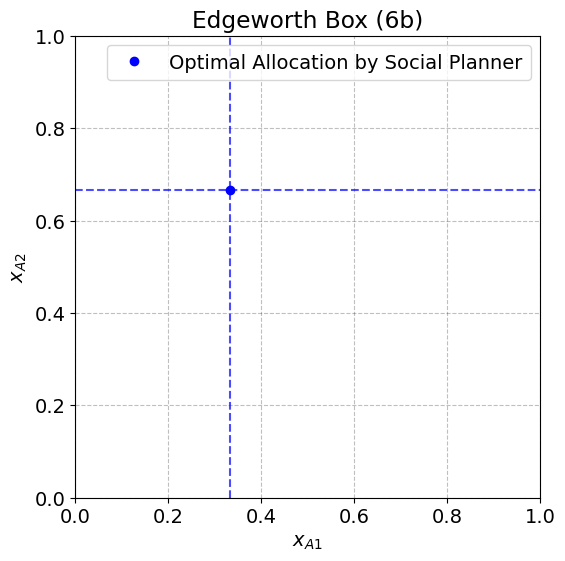

In [28]:
# Task 6b: Illustrate and compare the allocations
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([xA1_opt], [xA2_opt], 'bo', label='Optimal Allocation by Social Planner')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$x_{A1}$')
ax.set_ylabel('$x_{A2}$')
ax.axhline(y=xA2_opt, color='b', linestyle='--', alpha=0.7)
ax.axvline(x=xA1_opt, color='b', linestyle='--', alpha=0.7)
ax.legend()
plt.title('Edgeworth Box (6b)')
plt.show()

*The plot features a single blue point representing the optimal allocation determined by the social planner, where $x_1^A = 0.333$ and $x_2^A = 0.667$*

*The dashed lines indicate the corresponding values on the axes, providing a clear visual representation of this allocation.*

*This visualization allows us to compare the social planner's allocation with other possible allocations by showing where the optimal point lies within the feasible set of allocations in the Edgeworth box. It demonstrates how resources can be distributed to maximize the aggregate utility of both consumers, achieving an efficient and fair allocation under the utilitarian criterion.*

<span style="color:red;"> **Note on terminology: Pareto *optimality* requires that no person can be made better of without the other being made worse off, and it can be quite involved to check for this. As long as the allocations are within the area covered by C, thay are an Pareto *improvement* to the initial endowment.**

## <a id='toc8_'></a>[Question 7](#toc0_)

<span style="color:orange;">*We have used the help of AI, chatgpt, to solve this question.*

*We draw a set 𝑊 with 50 elements representing random initial endowments for consumer A. The code generates 50 random endowments for goods 1 $𝜔_{1A}$ and 2 $𝜔_{2A}$ using a uniform distribution between 0 and 1.
The task results show a uniform distribution of endowments across the unit square, suggesting a broad range of initial conditions for the exchange economy.* 

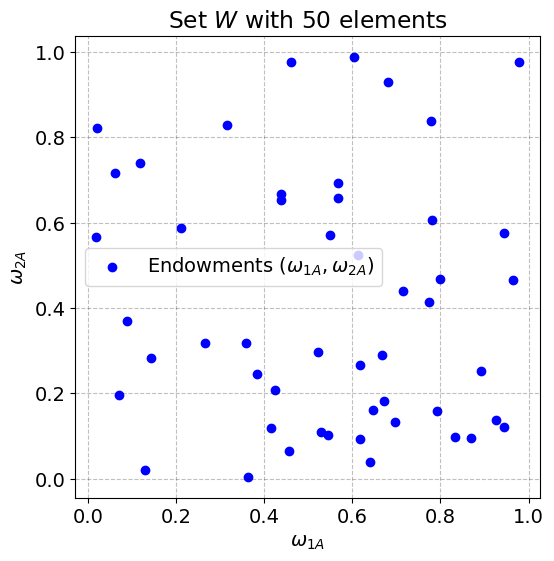

In [29]:
# Task 7: Draw a set W with 50 elements
n_elements = 50
np.random.seed(0)
omega_1A = np.random.uniform(0, 1, n_elements)
omega_2A = np.random.uniform(0, 1, n_elements)
W = np.column_stack((omega_1A, omega_2A))

plt.figure(figsize=(6, 6))
plt.scatter(W[:, 0], W[:, 1], color='blue', label='Endowments $(\omega_{1A}, \omega_{2A})$')
plt.title('Set $W$ with 50 elements')
plt.xlabel('$\omega_{1A}$')
plt.ylabel('$\omega_{2A}$')
plt.grid(True)
plt.legend()
plt.show()

*The results demonstrate a wide influence on potential market outcomes, with each dot representing a unique resource distribution between consumers A and B. The data points don't appear to be concentrated in one area, suggesting that every customer has a distinct capacity for utility and isn't drawn to a specific area of the plot.*

*The resulting plot displays these 50 endowments as blue dots within the Edgeworth box, where the x-axis represents $𝜔_{1A}$ and the y-axis represents $𝜔_{2A}$. Each point on the plot corresponds to a different pair of endowments for consumer A, illustrating the diverse possible initial allocations of goods.*

*This visualization helps us understand the variability in initial endowments that consumer A might have, providing a foundation for further analysis of market dynamics and resource allocation based on these initial conditions. The plot effectively shows the distribution and spread of the 50 random endowment pairs.*

## <a id='toc9_'></a>[Question 8](#toc0_)

<span style="color:orange;">*We have used the help of AI, chatgpt, to solve this question.*

*We aim to find and visualize the market equilibrium allocations for each initial endowment in set 
𝑊. The code iterates over the 50 random endowments generated for consumer A in Task 7. For each endowment pair, the code calculates the corresponding endowment for consumer B, ensuring the total endowment of each good remains one.*

*For each pair of endowments, the code creates an instance of the economy and finds the market clearing price $p_1$ that balances the market. It then calculates the equilibrium allocations for both consumers A and B at this price.*

*The resulting equilibrium allocations for consumer A are stored in equilibrium_allocations_A, and for consumer B in equilibrium_allocations_B. These allocations are then plotted within the Edgeworth box, where the x-axis represents the allocation of good 1 and the y-axis represents the allocation of good 2.*

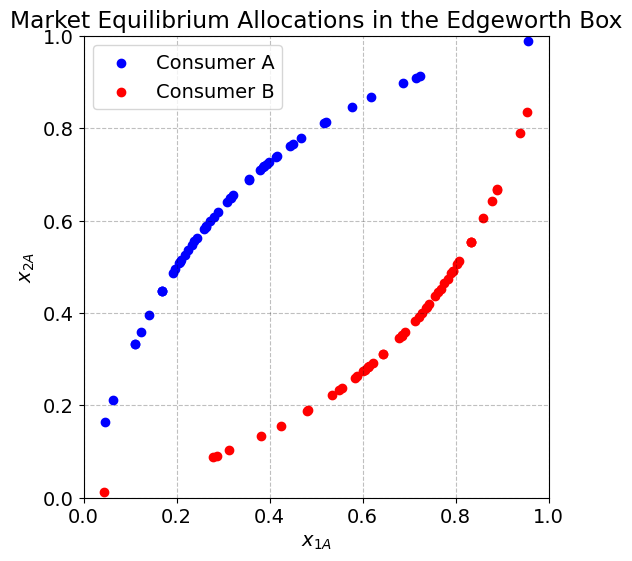

In [30]:
# Task 8: Find the market equilibrium allocation for each ωA ∈ W
equilibrium_allocations_A = []
equilibrium_allocations_B = []

for omega_A1, omega_A2 in W:
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2
    economy = ExchangeEconomyClass(alpha, beta, [omega_A1, omega_A2], [omega_B1, omega_B2])
    p1_star = economy.market_clearing_price()
    
    xA1_star = economy.x_A1_star(p1_star)
    xA2_star = economy.x_A2_star(p1_star)
    xB1_star = 1 - xA1_star
    xB2_star = 1 - xA2_star
    
    equilibrium_allocations_A.append((xA1_star, xA2_star))
    equilibrium_allocations_B.append((xB1_star, xB2_star))

equilibrium_allocations_A = np.array(equilibrium_allocations_A)
equilibrium_allocations_B = np.array(equilibrium_allocations_B)

fig, ax_A = plt.subplots(figsize=(6, 6))
ax_A.scatter(equilibrium_allocations_A[:, 0], equilibrium_allocations_A[:, 1], color='blue', label='Consumer A')
ax_A.scatter(equilibrium_allocations_B[:, 0], equilibrium_allocations_B[:, 1], color='red', label='Consumer B')
ax_A.set_xlabel('$x_{1A}$')
ax_A.set_ylabel('$x_{2A}$')
ax_A.set_title('Market Equilibrium Allocations in the Edgeworth Box')
ax_A.legend()
ax_A.grid(True)
ax_A.set_xlim([0, 1])
ax_A.set_ylim([0, 1])
plt.show()

*The plot shows the market equilibrium allocations as blue dots for consumer A and red dots for consumer B. This visualization highlights how the equilibrium allocations distribute the goods between the two consumers based on their initial endowments, providing insights into the dynamics of the market equilibrium for different starting points.*

*The scatter plot effectively demonstrates the range of equilibrium allocations, showing the diverse outcomes that can arise from varying initial endowments. This helps in understanding the market behavior and the allocation efficiency under different conditions.*